The objective of this competition is to build a recommendation engine to predict what restaurants customers are most likely to order from given the customer location, restaurant information, and the customer order history.

The error metric for this competition is the F1 score, which ranges from 0 (total failure) to 1 (perfect score). Hence, the closer your score is to 1, the better your model.

https://www.kaggle.com/mrmorj/restaurant-recommendation-challenge

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
vendors = pd.read_csv('vendors.csv')
orders = pd.read_csv('orders.csv')
train_customers = pd.read_csv('train_customers.csv')
train_locations = pd.read_csv('train_locations.csv')

C:\Users\alexp\anaconda3\envs\deep\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (15,16,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
orders.head(5)

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,vendor_rating,driver_rating,deliverydistance,preparationtime,delivery_time,order_accepted_time,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,NaN,92PEE24 X 0 X 105
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,NaN,MB7VY5F X 0 X 83
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,2019-08-01 04:03:00,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83


In [4]:
orders.dtypes

akeed_order_id                    float64
customer_id                        object
item_count                        float64
grand_total                       float64
payment_mode                        int64
promo_code                         object
vendor_discount_amount            float64
promo_code_discount_percentage    float64
is_favorite                        object
is_rated                           object
vendor_rating                     float64
driver_rating                     float64
deliverydistance                  float64
preparationtime                   float64
delivery_time                      object
order_accepted_time                object
driver_accepted_time               object
ready_for_pickup_time              object
picked_up_time                     object
delivered_time                     object
delivery_date                      object
vendor_id                           int64
created_at                         object
LOCATION_NUMBER                   

In [5]:
vendors.head(5)

,id,authentication_id,latitude,longitude,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,OpeningTime2,prepration_time,commission,is_akeed_delivering,discount_percentage,status,verified,rank,language,vendor_rating,sunday_from_time1,sunday_to_time1,sunday_from_time2,sunday_to_time2,monday_from_time1,monday_to_time1,monday_from_time2,monday_to_time2,tuesday_from_time1,tuesday_to_time1,tuesday_from_time2,tuesday_to_time2,wednesday_from_time1,wednesday_to_time1,wednesday_from_time2,wednesday_to_time2,thursday_from_time1,thursday_to_time1,thursday_from_time2,thursday_to_time2,friday_from_time1,friday_to_time1,friday_from_time2,friday_to_time2,saturday_from_time1,saturday_to_time1,saturday_from_time2,saturday_to_time2,primary_tags,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at,updated_at,device_type,display_orders
0,4,118597.0,-0.588596,0.754434,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,-,15,0.0,Yes,0.0,1.0,1,11,EN,4.4,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,"{""primary_tags"":""4""}",1.0,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1
1,13,118608.0,-0.471654,0.744470,Restaurants,2.0,0.7,5.0,1.0,08:30AM-10:30PM,-,14,0.0,Yes,0.0,1.0,1,11,EN,4.7,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,"{""primary_tags"":""7""}",1.0,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1.0,1.0,2018-05-03 12:32:06,2020-04-05 20:46:03,3,1
2,20,118616.0,-0.407527,0.643681,Restaurants,2.0,0.0,8.0,1.0,08:00AM-10:45PM,-,19,0.0,Yes,0.0,1.0,1,1,EN,4.5,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,"{""primary_tags"":""71""}",1.0,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",Y,1.0,1.0,2018-05-04 22:28:22,2020-04-07 16:35:55,3,1
3,23,118619.0,-0.585385,0.753811,Restaurants,2.0,0.0,5.0,1.0,10:59AM-10:30PM,-,16,0.0,Yes,0.0,1.0,1,11,EN,4.5,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,"{""primary_tags"":""46""}",1.0,"5,8,30,24","Burgers,Desserts,Fries,Salads",Y,1.0,1.0,2018-05-06 19:20:48,2020-04-02 00:56:17,3,1
4,28,118624.0,0.480602,0.552850,Restaurants,2.0,0.7,15.0,1.0,11:00AM-11:45PM,-,10,0.0,Yes,0.0,1.0,1,11,EN,4.4,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,01:30:00,17:45:00,23:59:00,00:01:00,01:30:00,17:45:00,23:59:00,"{""primary_tags"":""32""}",1.0,5,Burgers,Y,1.0,1.0,2018-05-17 22:12:38,2020-04-05 15:57:41,3,1


In [6]:
vendors.dtypes

id                        int64
authentication_id       float64
latitude                float64
longitude               float64
vendor_category_en       object
vendor_category_id      float64
delivery_charge         float64
serving_distance        float64
is_open                 float64
OpeningTime              object
OpeningTime2             object
prepration_time           int64
commission              float64
is_akeed_delivering      object
discount_percentage     float64
status                  float64
verified                  int64
rank                      int64
language                 object
vendor_rating           float64
sunday_from_time1        object
sunday_to_time1          object
sunday_from_time2        object
sunday_to_time2          object
monday_from_time1        object
monday_to_time1          object
monday_from_time2        object
monday_to_time2          object
tuesday_from_time1       object
tuesday_to_time1         object
tuesday_from_time2       object
tuesday_

In [7]:
train_customers.head(5)

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at
0,TCHWPBT,Male,NaN,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23
1,ZGFSYCZ,Male,NaN,1,1,EN,2018-02-09 12:04:42,2018-02-09 12:04:41
2,S2ALZFL,Male,NaN,0,1,EN,2018-03-14 18:31:43,2018-03-14 18:31:42
3,952DBJQ,Male,NaN,1,1,EN,2018-03-15 19:47:07,2018-03-15 19:47:07
4,1IX6FXS,Male,NaN,1,1,EN,2018-03-15 19:57:01,2018-03-15 19:57:01


In [8]:
train_customers.dtypes

akeed_customer_id     object
gender                object
dob                  float64
status                 int64
verified               int64
language              object
created_at            object
updated_at            object
dtype: object

In [9]:
train_locations.head(5)

,customer_id,location_number,location_type,latitude,longitude
0,02SFNJH,0,NaN,1.682392,-78.789737
1,02SFNJH,1,NaN,1.679137,0.766823
2,02SFNJH,2,NaN,-0.498648,0.661241
3,RU43CXC,0,Home,0.100853,0.438165
4,BDFBPRD,0,NaN,2.523125,0.733464


In [10]:
train_locations.dtypes

customer_id         object
location_number      int64
location_type       object
latitude           float64
longitude          float64
dtype: object

In [11]:
# Aggregate # orders, $ sales, and avg spent by customer location
# (customers can have multiple locations registered to themselves)

orders_location_grp = orders.groupby(['customer_id', 'LOCATION_NUMBER'])
orders_per_location = orders_location_grp['akeed_order_id'].count().rename('num_orders')    # multi index: [customer_id, LOCATION_NUMBER]
sales_per_location = orders_location_grp['grand_total'].sum().rename('amt_spent')           # multi index: [customer_id, LOCATION_NUMBER]

train_locations = train_locations.merge(sales_per_location, how='left', left_on=['customer_id', 'location_number'], right_index=True)
train_locations = train_locations.merge(orders_per_location, how='left', left_on=['customer_id', 'location_number'], right_index=True)
train_locations['avg_spend'] = train_locations['amt_spent'] / train_locations['num_orders']


In [12]:
# Aggregate # orders and $ sales by vendor

orders_vendor_grp = orders.groupby(by=['vendor_id'])
orders_per_vendor = orders_vendor_grp['akeed_order_id'].count().rename('num_orders')
grand_total_per_vendor = orders_vendor_grp['grand_total'].sum().rename('amt_sales')

vendors = vendors.merge(orders_per_vendor, how='left', left_on='id', right_index=True)
vendors = vendors.merge(grand_total_per_vendor, how='left', left_on='id', right_index=True)
vendors['avg_sale'] = vendors['amt_sales'] / vendors['num_orders']

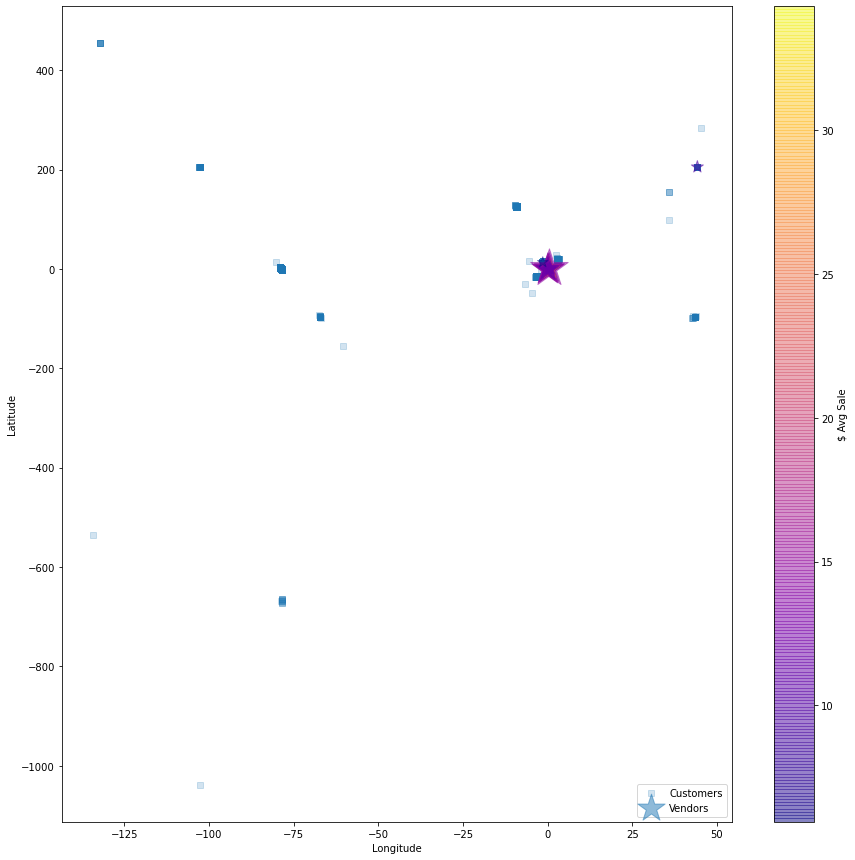

In [13]:
# Map out orders and vendors

plt.figure(figsize=(15, 15))
plt.scatter(x=train_locations.longitude, y=train_locations.latitude, label='Customers', marker='s', alpha=0.2)
plt.scatter(x=vendors.longitude, y=vendors.latitude, label='Vendors', marker='*', alpha=0.5, s=vendors['num_orders']/5, c=vendors['avg_sale'], cmap='plasma')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='lower right')
plt.colorbar(label='$ Avg Sale')
plt.show()

# Stars:
#   Size: Unpopular <----------> Popular
#   Heat:     Cheap <----------> Expensive

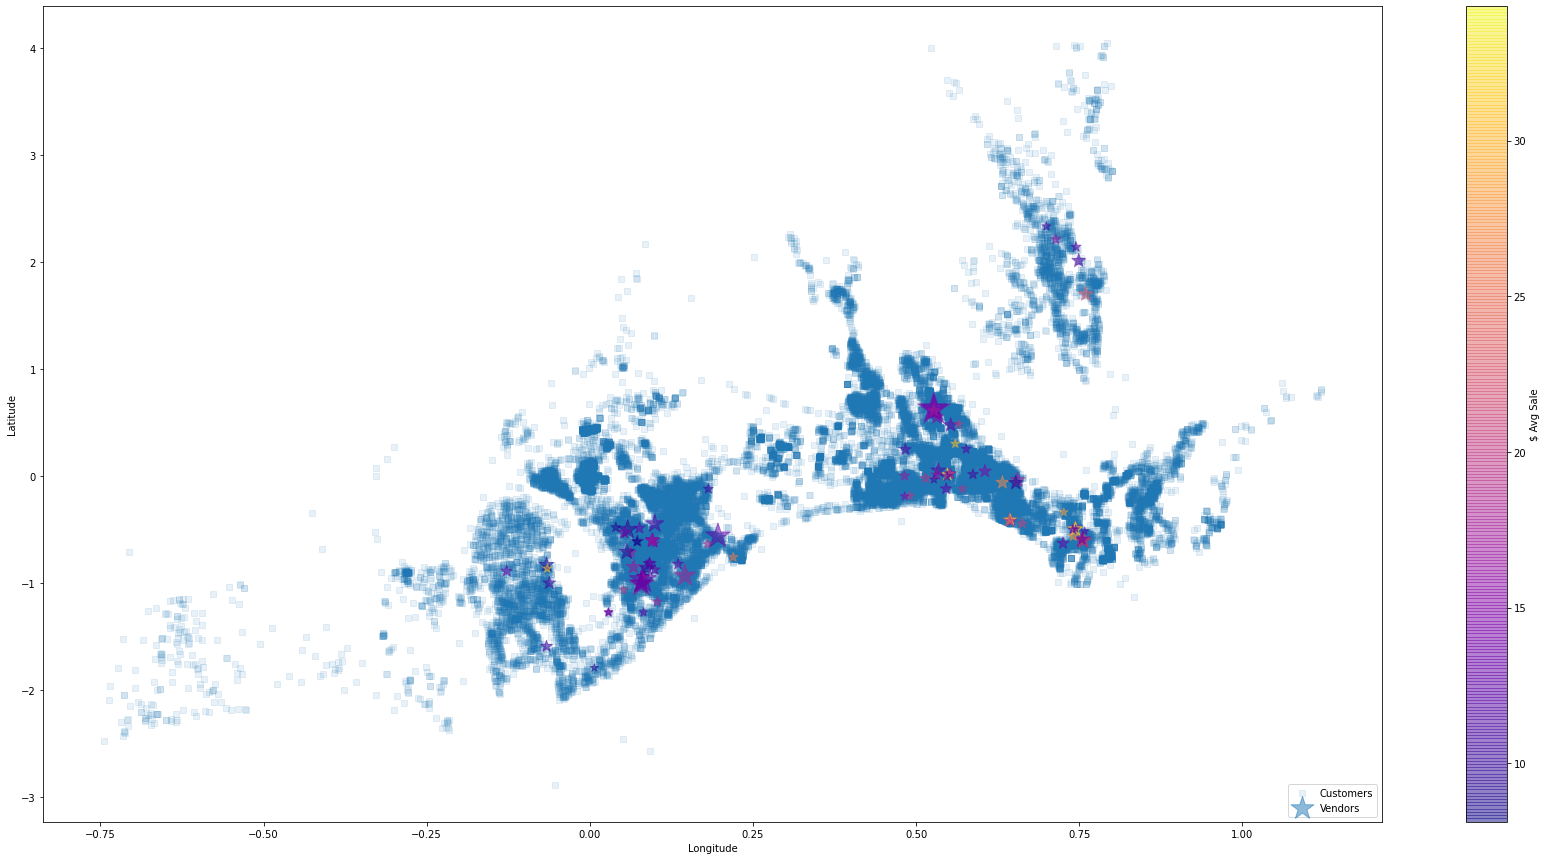

In [15]:
# Outliers in location are probably a mistake (GPS error?)
# Zoom in on area close with most activity
#     Marker Size = # Orders
#           Color = $ Grand Total

lo = -0.75
hi = 2

filt1 = (lo < train_locations['longitude']) & (train_locations['longitude'] < hi)
filt2 = (lo < vendors['longitude']) & (vendors['longitude'] < hi)
train_locations_cut = train_locations[filt1]
vendors_cut = vendors[filt2]

plt.figure(figsize=(30, 15))
plt.scatter(x=train_locations_cut.longitude, y=train_locations_cut.latitude, label='Customers', marker='s', alpha=0.1)
plt.scatter(x=vendors_cut.longitude, y=vendors_cut.latitude, label='Vendors', marker='*', alpha=0.5, s=vendors_cut['num_orders']/7, c=vendors_cut['avg_sale'], cmap='plasma')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='lower right')
plt.colorbar(label='$ Avg Sale')
plt.show()

# Stars:
#   Size: Unpopular <----------> Popular
#   Heat:     Cheap <----------> Expensive


**Note from VariableDefinitions.txt:** 

Not true latitude and longitude - locations have been masked, but nearby locations remain nearby in the new reference frame and can thus be used for clustering. 

However, not all locations are useful due to GPS errors and missing data - you may want to treat outliers separately.
